# Desafío entregable #2: Visualizaciones en Python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### De los tres datasets presentados en el desafío #1 seleccioné el dataset "Spotify_Track_Dataset" por ser el más completo y mejor documentado.

#### Fuente: https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset

In [2]:
df = pd.read_csv('Spotify_Track_Dataset.csv')

### Recordemos brevemente la estructura del dataset

In [3]:
df.shape

(114000, 21)

In [4]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

### Inspeccionemos los géneros musicales del dataset

In [6]:
print(df['track_genre'].unique(), '\n')
print('Hay ' + str(len(df['track_genre'].unique())) + ' géneros musicales en la lista.')

['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk'
 'house' 'idm' 'indian' 'indie-pop' 'indie' 'industrial' 'iranian'
 'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids' 'latin'
 'latino' 'malay' 'mandopop' 'metal' 'metalcore' 'minimal-techno' 'mpb'
 'new-age' 'opera' 'pagode' 'party' 'piano' 'pop-film' 'pop' 'power-pop'
 'progressive-house' 'psych-rock' 'punk-rock' 'punk' 'r-n-b' 'reggae'
 'reggaeton' 'rock-n-roll' 'rock' 'rockabilly' 'romance' 'sad' 'salsa'
 'samba' 'sertanejo' 'show

#### Debido a la gran cantidad de géneros musicales presentes en el dataset, voy a hacer un sub-dataset con sólo algunos géneros musicales, los cuales serán los cinco géneros más populares. Con dicho sub-dataset se harán algunos gráficos discriminando por género musical.

In [7]:
# Promedio de popularidad de las canciones, agrupadas por género musical
popularity_mean = df['popularity'].groupby(df['track_genre']).mean()

# Ordeno la popularidad promedio de mayor a menor
most_popular_genres = popularity_mean.sort_values(ascending=False).head(5)
print(most_popular_genres)

# Armo una lista con los diez géneros de mayor popularidad promedio
popularity_list = most_popular_genres.index.to_list()

# Armo el mencionado sub-dataset
df_popularity = df.loc[df['track_genre'].isin(popularity_list)]

track_genre
pop-film    59.283
k-pop       56.896
chill       53.651
sad         52.379
grunge      49.594
Name: popularity, dtype: float64


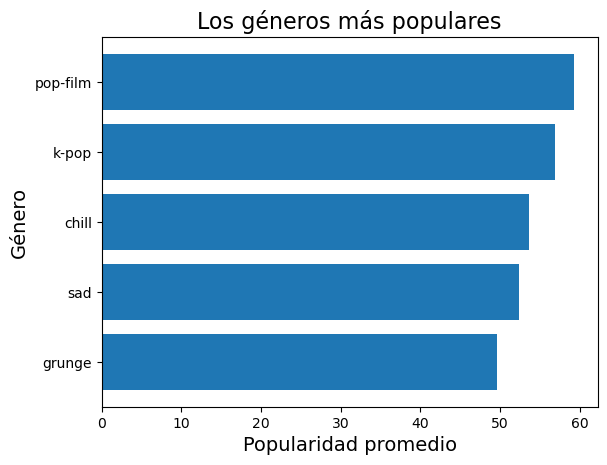

In [8]:
plt.barh(most_popular_genres.index[::-1], most_popular_genres[::-1])
plt.xticks()
plt.xlabel('Popularidad promedio', fontsize = 14)
plt.ylabel('Género', fontsize = 14)
plt.title('Los géneros más populares', fontsize = 16)
plt.show()

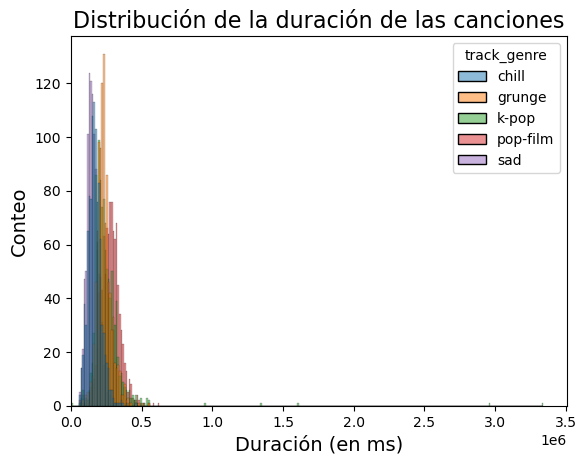

In [9]:
sns.histplot(data = df_popularity, x = 'duration_ms', hue = 'track_genre')
plt.xlim(0, None)
plt.xlabel('Duración (en ms)', fontsize = 14) 
plt.ylabel('Conteo', fontsize = 14) 
plt.title('Distribución de la duración de las canciones', fontsize = 16)
plt.show()

#### Vemos que la mayoría de las canciones se ubican en el rango 0 - 0.5e6 ms, sin embargo parece haber canciones que se apartan considerablemente. Se realizará un boxplot para evaluar posibles outliers.  

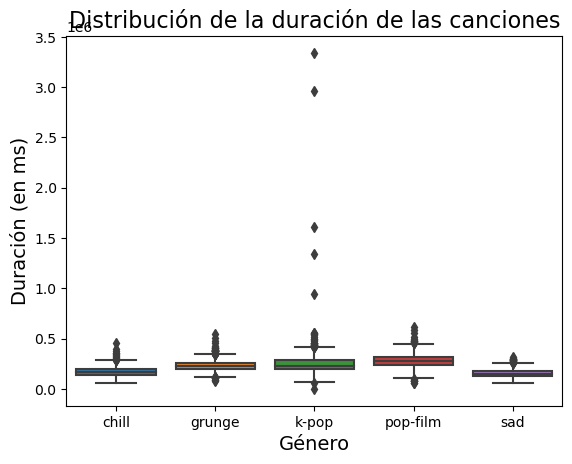

In [10]:
sns.boxplot(data = df_popularity, x = 'track_genre', y = 'duration_ms')
plt.ylabel('Duración (en ms)', fontsize = 14) 
plt.xlabel('Género', fontsize = 14) 
plt.title('Distribución de la duración de las canciones', fontsize = 16)
plt.show()

#### Vemos que todos los géneros presentan outliers, tanto para canciones de corta duración como de larga duración. Sin embargo, el género k-pop parece destacarse con canciones realmente largas. Repito el gráfico anterior pero usando el comando ylim para ver en más detalle los distintos parámetros estadísticos. (Este gráfico no lo considero dentro de los seis gráficos solicitados). 

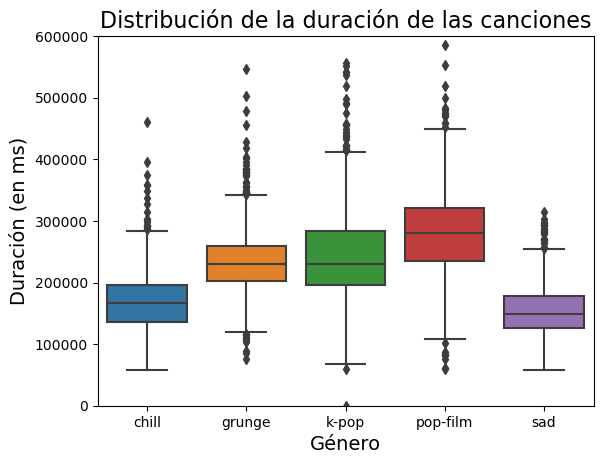

In [11]:
sns.boxplot(data = df_popularity, x = 'track_genre', y = 'duration_ms')
plt.ylabel('Duración (en ms)', fontsize = 14) 
plt.xlabel('Género', fontsize = 14) 
plt.ylim(0, 0.6e6)
plt.title('Distribución de la duración de las canciones', fontsize = 16)
plt.show()

#### A pesar que ubicarse en una determinada franja de duración, parece haber algunas diferencias estadísticas en la duración de las canciones según el género. Por ejemplo, el género "sad", presentaciones en general más cortas que el género "pop-film". La duración de las canciones es un posible parámetro de recomendación de canciones, por ejemplo los usuarios podrían preferir canciones que no duren más de un determinado valor. 

#### Inspeccionando las variables, se encuentra que explicit es un booleano, indicando con True que las canciones poseen letras explícitas y con False las que no. Con un gráfico de torta representamos la proporción de canciones en cada clasificación.

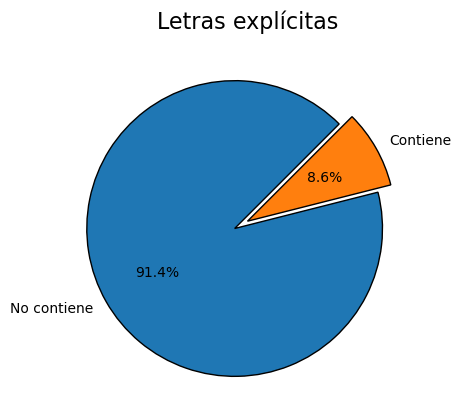

In [12]:
plt.pie(df.groupby('explicit').size(), labels = ('No contiene', 'Contiene'),  explode = (0.1, 0), startangle = 45, autopct = '%1.1f%%', wedgeprops = {"edgecolor" : "black", 'linewidth': 1})
plt.title('Letras explícitas', fontsize = 16)
plt.show()

#### Esta es otra variable a considerar, filtrar las canciones no explícitas de las explícitas es de utilidad para padres que buscan no exponer a sus hijos de corta edad a letras no aptas para menores.

### Inspeccionemos otras variables en el dataset

#### En la descripción de las variables hay algunas que a priori parecen opuestas, por ejemplo "instrumentalness" y "speechiness". La primera describe la ausencia de vocalización (a mayor valor menor presencia de vocalización), en tanto que la segunda describe la presencia de la palabra hablada. 

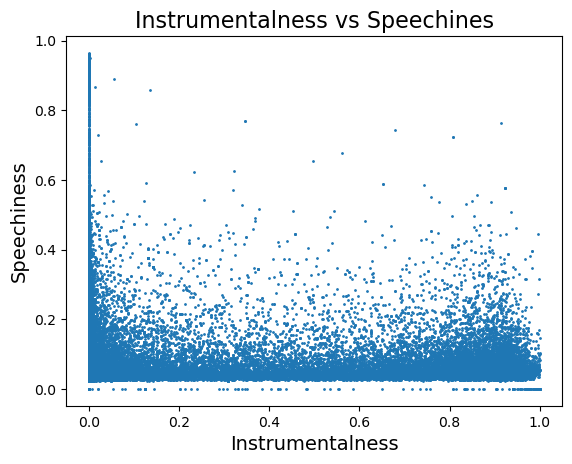

In [13]:
plt.scatter(df['instrumentalness'], df['speechiness'], s = 1)
plt.xlabel('Instrumentalness', fontsize = 14) 
plt.ylabel('Speechiness', fontsize = 14)
plt.title('Instrumentalness vs Speechines', fontsize = 16) 
plt.show()

#### El gráfico nos brinda información interesante. Vemos que la mayoría de las canciones se ubican por debajo de 0,2 de speechiness, indicando que en general la palabra no es hablada, sino cantada. Por otro lado, las canciones con valor 0 de instrumentalness presentan un amplio rango de valores de speechiness. La relación entre las variables es más compleja que la inicialmente pensada, no son estrictamente opuestas.  

#### Al contrario que en las dos variables anteriores, las variables energy (mide la intensidad percibida) y loudness (volumen promedio en decibelios) posiblemente estén correlacionas. Inspeccionemos con otro gráfico scatter.

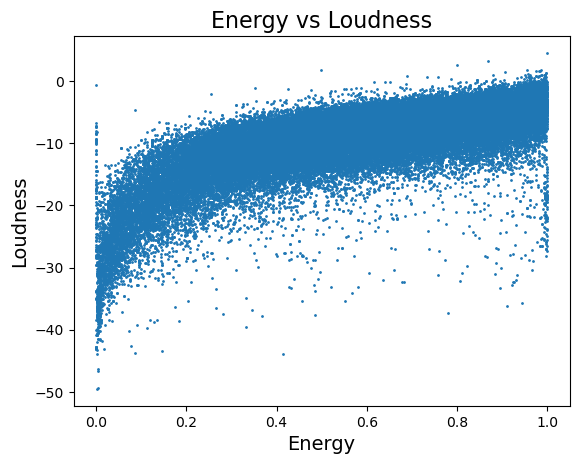

In [14]:
plt.scatter(df['energy'], df['loudness'], s = 1)
plt.xlabel('Energy', fontsize = 14) 
plt.ylabel('Loudness', fontsize = 14) 
plt.title('Energy vs Loudness', fontsize = 16) 
plt.show()

#### Se observa fácilmente que a mayor energía en la canción, mayor volumen. Es decir, una correlación positiva. Estas inspecciones pueden resumirse mediante un mapa de calor de los coeficientes de correlación entre pares de variables, como se muestra a continuación.

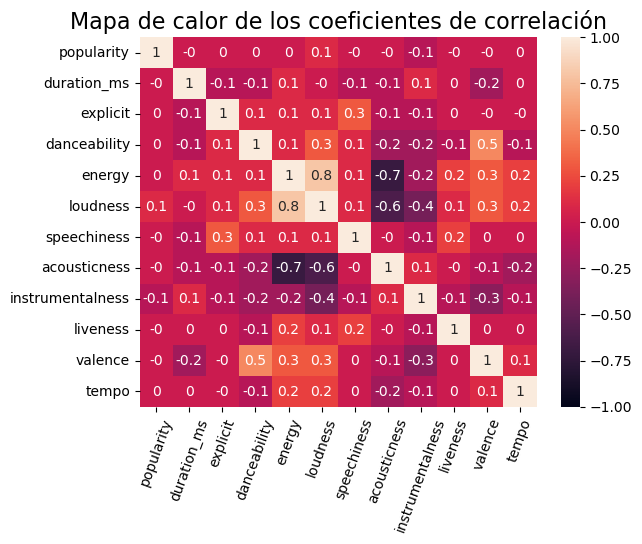

In [15]:
# Elimino variables que no son de interés y para hacer más legible el mapa de calor
df1 = df.drop(['Unnamed: 0', 'key', 'mode', 'time_signature'], axis = 1)
 
sns.heatmap(df1.corr().round(1), vmin=-1, vmax=1, cbar = True, annot=True)
plt.xticks(rotation = 70)
plt.title('Mapa de calor de los coeficientes de correlación', fontsize = 16)
plt.show()

#### Se observan varios pares de variables con medios y altos coeficientes de correlaciones positivas y negativas. Esto puede ser de utilidad para el sistema de recomendación de canciones. Por ejemplo, si un usuario busca canciones para relajarse posiblemente debamos descartar canciones de altos valores de energy, loudness y tempo, estas variables se correlacionan negativamente con la variable acousticness. Por lo tanto, las canciones con alto valor de acousticness posiblemente sean buenas opciones para los usuarios en busca de canciones relajantes.